In [44]:
import warnings
warnings.filterwarnings("ignore") 

In [45]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import timedelta,datetime
df=pd.read_csv('C:\\workplace\\electricity_demand\\dataset\\AEP_hourly.csv')
df.columns=['date_time','aep_mw']
df['date_time']=pd.to_datetime(df['date_time'])
df.sort_values('date_time',ascending=True,inplace=True)

In [46]:
df.head()

,date_time,aep_mw
2183,2004-10-01 01:00:00,12379.0
2184,2004-10-01 02:00:00,11935.0
2185,2004-10-01 03:00:00,11692.0
2186,2004-10-01 04:00:00,11597.0
2187,2004-10-01 05:00:00,11681.0


In [47]:
datetime.fromisoformat('2004-10-01 01:00:00')+timedelta(hours=2)

datetime.datetime(2004, 10, 1, 3, 0)

In [48]:
def preparion (df,num_lags,lag_feature):

    df_prpocessed=pd.DataFrame(index=df.index,columns=['date_time']+['lags_{}'.format(i) for i in range(num_lags)]+['target'])
    df_prpocessed['target']=df[lag_feature].shift(-1)
    for i in range(num_lags):
        df_prpocessed['lags_{}'.format(i)]=df[lag_feature].shift(i)

    df_prpocessed['date_time']=df['date_time']
    df_prpocessed.dropna(inplace=True)
    return df_prpocessed

In [49]:
train_df=df[df['date_time']<='2017-08-02 23:00:00']


test_df=df[df['date_time']>'2017-08-02 23:00:00']

In [50]:
train_df

,date_time,aep_mw
2183,2004-10-01 01:00:00,12379.0
2184,2004-10-01 02:00:00,11935.0
2185,2004-10-01 03:00:00,11692.0
2186,2004-10-01 04:00:00,11597.0
2187,2004-10-01 05:00:00,11681.0
...,...,...
111021,2017-08-02 19:00:00,19151.0
111022,2017-08-02 20:00:00,18495.0
111023,2017-08-02 21:00:00,17771.0
111024,2017-08-02 22:00:00,17220.0


In [51]:
train_df=preparion(train_df,168*4,'aep_mw')
train_df.head(20)

,date_time,lags_0,lags_1,lags_2,lags_3,lags_4,lags_5,lags_6,lags_7,lags_8,...,lags_663,lags_664,lags_665,lags_666,lags_667,lags_668,lags_669,lags_670,lags_671,target
1558,2004-10-29 00:00:00,13355.0,14353.0,15309.0,15581.0,15637.0,15091.0,14908.0,15028.0,15143.0,...,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0,11935.0,12379.0,12510.0
1511,2004-10-29 01:00:00,12510.0,13355.0,14353.0,15309.0,15581.0,15637.0,15091.0,14908.0,15028.0,...,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0,11935.0,12022.0
1512,2004-10-29 02:00:00,12022.0,12510.0,13355.0,14353.0,15309.0,15581.0,15637.0,15091.0,14908.0,...,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11692.0,11753.0
1513,2004-10-29 03:00:00,11753.0,12022.0,12510.0,13355.0,14353.0,15309.0,15581.0,15637.0,15091.0,...,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11597.0,11530.0
1514,2004-10-29 04:00:00,11530.0,11753.0,12022.0,12510.0,13355.0,14353.0,15309.0,15581.0,15637.0,...,15404.0,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,11681.0,11744.0
1515,2004-10-29 05:00:00,11744.0,11530.0,11753.0,12022.0,12510.0,13355.0,14353.0,15309.0,15581.0,...,15655.0,15404.0,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,12280.0,12355.0
1516,2004-10-29 06:00:00,12355.0,11744.0,11530.0,11753.0,12022.0,12510.0,13355.0,14353.0,15309.0,...,15739.0,15655.0,15404.0,15375.0,15242.0,15118.0,14903.0,14618.0,13692.0,13861.0
1517,2004-10-29 07:00:00,13861.0,12355.0,11744.0,11530.0,11753.0,12022.0,12510.0,13355.0,14353.0,...,15739.0,15739.0,15655.0,15404.0,15375.0,15242.0,15118.0,14903.0,14618.0,15040.0
1518,2004-10-29 08:00:00,15040.0,13861.0,12355.0,11744.0,11530.0,11753.0,12022.0,12510.0,13355.0,...,15644.0,15739.0,15739.0,15655.0,15404.0,15375.0,15242.0,15118.0,14903.0,15295.0
1519,2004-10-29 09:00:00,15295.0,15040.0,13861.0,12355.0,11744.0,11530.0,11753.0,12022.0,12510.0,...,15353.0,15644.0,15739.0,15739.0,15655.0,15404.0,15375.0,15242.0,15118.0,15491.0


In [9]:
X_train=np.array(train_df.drop(['date_time','target'],axis=1))
y_train=np.array(train_df['target']).reshape(-1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(X_train)
X_train_num=scaler.transform(X_train)

# Training the model

## Hyperparameter parameter tuning

In [ ]:
from sklearn.model_selection import train_test_split
X_fit,X_val,y_fit,y_val=train_test_split(X_train_num,y_train,test_size=0.3,shuffle=True)

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM,Dense,Input
from tensorflow.keras.losses import MeanAbsoluteError 
from tensorflow.keras.metrics import MeanAbsolutePercentageError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model=Sequential()
model.add(Input((X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(),loss=MeanAbsoluteError(),metrics=[MeanAbsolutePercentageError()])
stoppage=EarlyStopping(patience=50)
model.fit(X_fit,y_fit,validation_data=(X_val,y_val),epochs=5000,callbacks=[stoppage])

In [ ]:
val_df=pd.DataFrame(model.history.history)

In [ ]:
val_df.columns

In [ ]:
val_df[[ 'mean_absolute_percentage_error','val_mean_absolute_percentage_error']].plot()

In [ ]:
np.argmin(val_df['val_mean_absolute_percentage_error'])

## Fitting a final model

In [ ]:
model=Sequential()
model.add(Input((X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(),loss=MeanAbsoluteError())
#stoppage=EarlyStopping(patience=50)
model.fit(X_train_num,y_train,epochs=868)

In [ ]:
#from keras.models import load_model

#model.save('C:\\workplace\\electricity_demand\\models\\mlp.h5')

# One step ahead forecast

In [11]:
from tensorflow.keras.models import load_model
model=load_model('C:\\workplace\\electricity_demand\\models\\mlp.h5')

In [12]:
X_test=preparion(df,168*4,'aep_mw')
y_test=np.array(X_test.loc[X_test['date_time']>'2017-08-02 23:00:00','target']).reshape(-1)
X_test=X_test[X_test['date_time']>'2017-08-02 23:00:00'].drop(['target','date_time'],axis=1)
X_test=scaler.transform(X_test)
pred=model.predict(X_test)
#X_test.head()

274/274 [==============================] - 1s 2ms/step


In [13]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error 
mean_absolute_error(y_test,pred),mean_absolute_percentage_error(y_test,pred)

(104.98235855450913, 0.007108852422681379)

In [33]:
index_test=preparion(df,168*4,'aep_mw')
index_test['date_time']=index_test['date_time'].astype(str)
index_test=index_test[index_test['date_time']>'2017-08-02 23:00:00']['date_time']

<Axes: xlabel='date_time'>

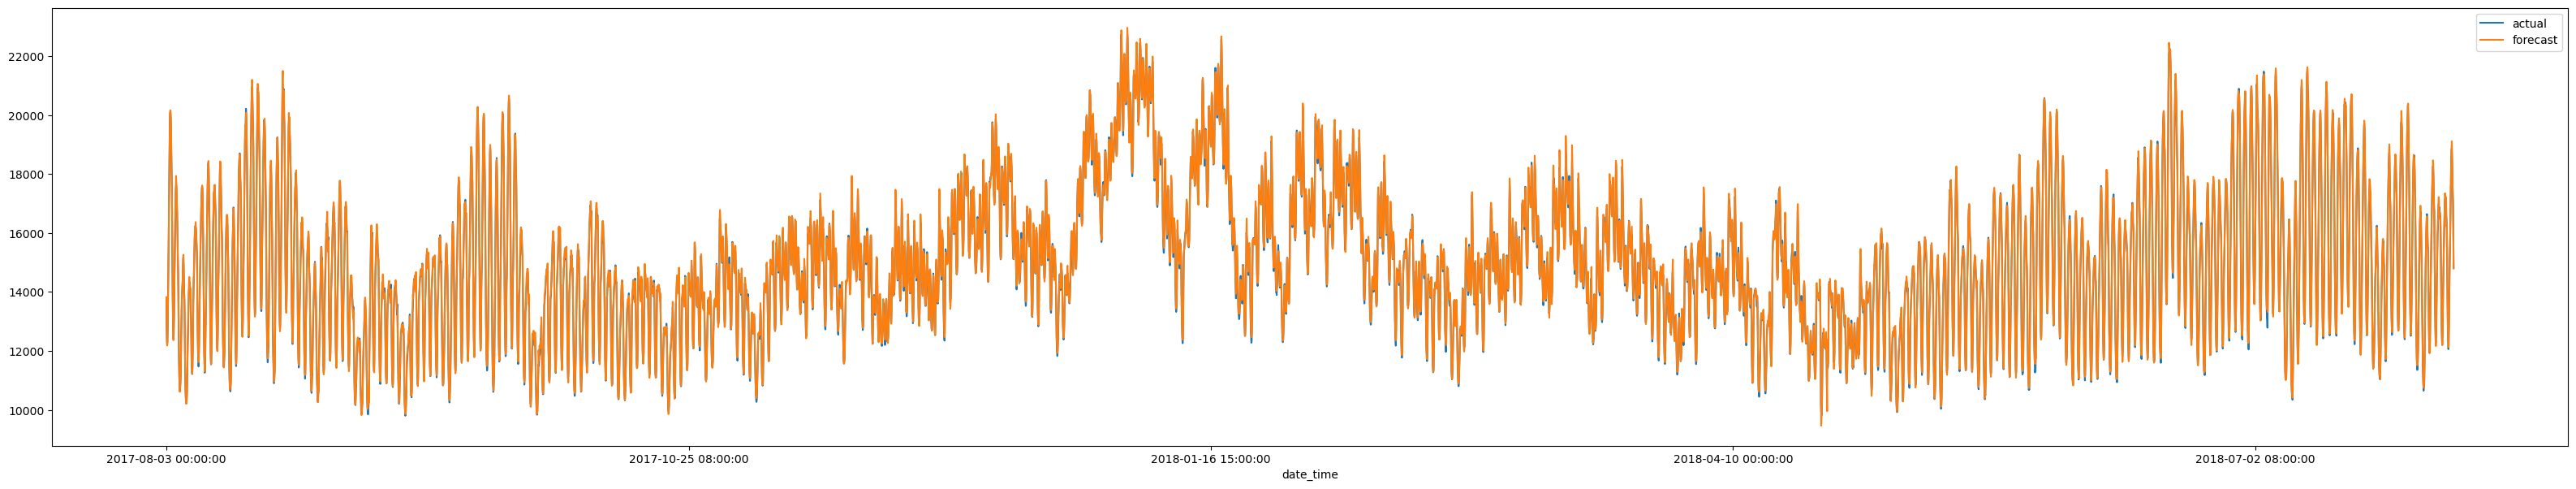

In [34]:
one_step_df=pd.concat([pd.Series(y_test,index=index_test),pd.Series(pred.reshape(-1),index=index_test)],axis=1)
one_step_df.columns=['actual','forecast']
one_step_df.plot(figsize=(40,7))

In [35]:
one_step_df.index[0]

'2017-08-03 00:00:00'

In [40]:
one_step_df.index[5]

'2017-08-03 05:00:00'

In [42]:
import plotly.graph_objects as go 
figure=go.Figure()
figure.add_trace(go.Scatter(x=one_step_df.index,y=one_step_df['actual'],name='actual'))
figure.add_trace(go.Scatter(x=one_step_df.index,y=one_step_df['forecast'],name='forecast'))